In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#defining variables
IMAGE_SIZE = 256 
BATCH_SIZE =32
CHANNELS = 3 
EPOCHS = 50 

In [4]:
Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Dataset ",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32
    )

Found 2247 files belonging to 2 classes.


In [5]:
class_names = Dataset.class_names

In [6]:
len(Dataset)

71

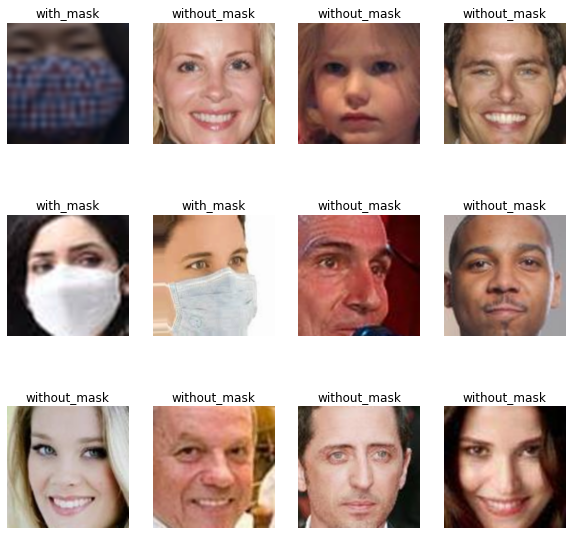

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in Dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
  

In [8]:
#test train split 
Dataset.shuffle(10000 , seed = 12 )
train_ds  = Dataset.take(57)
test_ds = Dataset.skip(57)
val_ds = test_ds.take(7)
test_ds = test_ds.skip(7)

In [9]:
train_ds

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [11]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [12]:
#data_augmentation 
#resize and rescale 

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = keras.models.Sequential([

    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

In [15]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [16]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
57/57 [==============================] - 31s 377ms/step - loss: 1.1332 - accuracy: 0.8185 - val_loss: 0.1093 - val_accuracy: 0.9777
Epoch 2/50
57/57 [==============================] - 6s 111ms/step - loss: 0.1285 - accuracy: 0.9589 - val_loss: 0.1714 - val_accuracy: 0.9420
Epoch 3/50
57/57 [==============================] - 6s 111ms/step - loss: 0.1080 - accuracy: 0.9638 - val_loss: 0.0980 - val_accuracy: 0.9777
Epoch 4/50
57/57 [==============================] - 6s 110ms/step - loss: 0.0932 - accuracy: 0.9688 - val_loss: 0.0669 - val_accuracy: 0.9777
Epoch 5/50
57/57 [==============================] - 6s 110ms/step - loss: 0.0754 - accuracy: 0.9781 - val_loss: 0.2165 - val_accuracy: 0.9152
Epoch 6/50
57/57 [==============================] - 6s 112ms/step - loss: 0.1285 - accuracy: 0.9611 - val_loss: 0.0608 - val_accuracy: 0.9866
Epoch 7/50
57/57 [==============================] - 6s 110ms/step - loss: 0.0630 - accuracy: 0.9775 - val_loss: 0.1920 - val_accuracy: 0.9688
Epoch

In [17]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 6s 73ms/step - loss: 0.0266 - accuracy: 0.9899


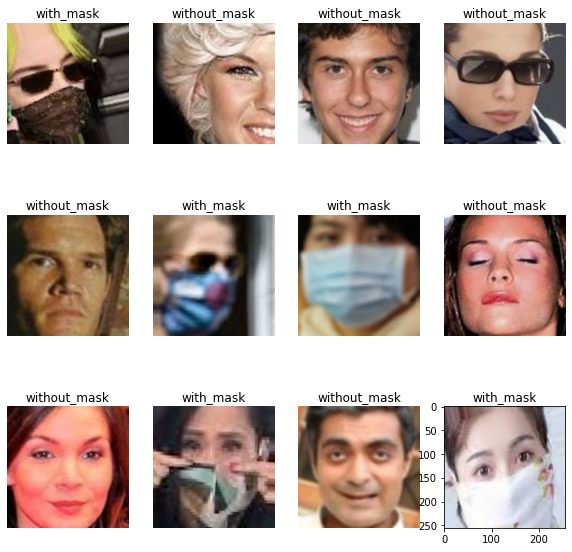

In [18]:
plt.figure(figsize=(10, 10))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(12):
      plt.axis("off")
      ax = plt.subplot(3, 4, i + 1)
      plt.imshow(images_batch[i].numpy().astype('uint8'))
      batch_prediction = model.predict(images_batch)
      p = class_names[np.argmax(batch_prediction[i])]
      plt.title(p)


In [24]:
model.save("/content/drive/MyDrive/models")
saved_model_path = "./models/1"

INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/assets
